In [1]:
%config IPCompleter.greedy=True
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', -1)

%matplotlib inline

sns.set(style="white", context="talk")



d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')


ks_2018_data = pd.read_csv('ks-projects-201801.csv')
country_codes = pd.read_csv('c_codes.csv')


#ks_2016_data = pd.read_csv('ks-projects-201612.csv')

#ks_2018_data = pd.read_csv('ks-projects-201801.csv', parse_dates = ['deadline'], date_parser=d)
#ks_2018_data['avg_pledge_amount'] = ks_2018_data['usd_pledged_real'] / ks_2018_data['backers']


#sns.factorplot('state',data=ks_2018_data,kind='count', size=10)



### EDA ###

1. General descrribe on all numerical columns 

In [2]:
ks_2018_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


In [3]:
country_codes.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [4]:
ks_2018_data.join(country_codes, lsuffix='country', rsuffix='Code').head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Name,Code
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,Afghanistan,AF
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,Åland Islands,AX
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,Albania,AL
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,Algeria,DZ
4,1000011046,Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,American Samoa,AS


In [5]:
print(ks_2018_data.shape)
print(ks_2018_data.columns)

ks_2018_data.describe()

(378661, 15)
Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00,378661.00,378661.00,378661.00,374864.00,378661.00,378661.00
mean,1074731191.99,49080.79,9682.98,105.62,7036.73,9058.92,45454.40
std,619086204.32,1183391.26,95636.01,907.19,78639.75,90973.34,1152950.06
min,5971.00,0.01,0.00,0.00,0.00,0.00,0.01
25%,538263516.00,2000.00,30.00,2.00,16.98,31.00,2000.00
50%,1075275634.00,5200.00,620.00,12.00,394.72,624.33,5500.00
75%,1610148624.00,16000.00,4076.00,56.00,3034.09,4050.00,15500.00
max,2147476221.00,100000000.00,20338986.27,219382.00,20338986.27,20338986.27,166361390.71


In [6]:
print(ks_2018_data.main_category.value_counts())

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts          8809 
Journalism      4755 
Dance           3768 
Name: main_category, dtype: int64


In [7]:
print(ks_2018_data.category.value_counts())

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction              9169 
Fashion              8554 
Nonfiction           8318 
Art                  8253 
Apparel              7166 
Theater              7057 
Technology           6930 
Rock                 6758 
Children's Books     6756 
Apps                 6345 
Publishing           6018 
Webseries            5762 
Photography          5752 
Indie Rock           5657 
Narrative Film       5188 
Web                  5153 
Comics               4996 
Crafts               4664 
Country & Folk       4451 
Design               4199 
Hip-Hop              3912 
Hardware             3663 
                     ...  
Couture              275  
Blues                268  
Animals              255  
Fabrication Tools    250  
Printing             238  
Makerspaces          238  
M

In [8]:
print(ks_2018_data.state.value_counts())
print(ks_2018_data.currency.value_counts())
print(ks_2018_data.country.value_counts())

failed        197719
successful    133956
canceled      38779 
undefined     3562  
live          2799  
suspended     1846  
Name: state, dtype: int64
USD    295365
GBP    34132 
EUR    17405 
CAD    14962 
AUD    7950  
SEK    1788  
MXN    1752  
NZD    1475  
DKK    1129  
CHF    768   
NOK    722   
HKD    618   
SGD    555   
JPY    40    
Name: currency, dtype: int64
US      292627
GB      33672 
CA      14756 
AU      7839  
DE      4171  
N,0"    3797  
FR      2939  
IT      2878  
NL      2868  
ES      2276  
SE      1757  
MX      1752  
NZ      1447  
DK      1113  
IE      811   
CH      761   
NO      708   
HK      618   
BE      617   
AT      597   
SG      555   
LU      62    
JP      40    
Name: country, dtype: int64


In [9]:
ks_2018_data.deadline.describe()

count     378661    
unique    3164      
top       2014-08-08
freq      705       
Name: deadline, dtype: object

In [10]:
ks_2018_data.launched.describe()

count     378661             
unique    378089             
top       1970-01-01 01:00:00
freq      7                  
Name: launched, dtype: object

In [11]:
ks_2018_data['launched_date'] = pd.to_datetime(ks_2018_data['launched'], format='%Y-%m-%d %H:%M:%S', utc=True)
ks_2018_data['deadline_date'] = pd.to_datetime(ks_2018_data['deadline'], format='%Y-%m-%d %H:%M:%S', utc=True)

#ks_2018_data.launched_date[0]
#ks_2018_data['deadline_date'][0]

In [12]:
ks_2018_data['duration'] = ks_2018_data.deadline_date - ks_2018_data.launched_date

In [13]:
ks_2018_data.duration.describe()

count    378661                 
mean     33 days 21:58:10.533968
std      65 days 21:55:09.506515
min      0 days 00:07:17        
25%      29 days 02:20:36       
50%      29 days 16:32:32       
75%      36 days 15:35:44       
max      16738 days 23:00:00    
Name: duration, dtype: object

In [14]:
print(ks_2018_data.launched_date.min())
print(ks_2018_data.launched_date.max())

print(ks_2018_data.deadline_date.min())
print(ks_2018_data.deadline_date.max())

1970-01-01 01:00:00+00:00
2018-01-02 15:02:31+00:00
2009-05-03 00:00:00+00:00
2018-03-03 00:00:00+00:00


In [15]:
ks_2018_data[ks_2018_data.duration > pd.Timedelta(days=95)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.00,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,5000.00,1970-01-01 01:00:00+00:00,2010-09-15 00:00:00+00:00,14866 days 23:00:00
48147,1245461087,1st Super-Size Painting - Social Network Owned (Canceled),Art,Art,USD,2010-08-14,15000.00,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,15000.00,1970-01-01 01:00:00+00:00,2010-08-14 00:00:00+00:00,14834 days 23:00:00
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.00,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,700.00,1970-01-01 01:00:00+00:00,2010-05-21 00:00:00+00:00,14749 days 23:00:00
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughter"" Project Development! (Canceled)",Theater,Theater,USD,2010-06-01,4000.00,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,4000.00,1970-01-01 01:00:00+00:00,2010-06-01 00:00:00+00:00,14760 days 23:00:00
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Causes, 1 Song For Each Cause (Canceled)",Music,Music,USD,2010-05-04,10000.00,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,10000.00,1970-01-01 01:00:00+00:00,2010-05-04 00:00:00+00:00,14732 days 23:00:00
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.00,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,500.00,1970-01-01 01:00:00+00:00,2010-04-10 00:00:00+00:00,14708 days 23:00:00
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.00,1970-01-01 01:00:00,0.00,suspended,0,CH,0.00,0.00,1905.97,1970-01-01 01:00:00+00:00,2015-10-31 00:00:00+00:00,16738 days 23:00:00


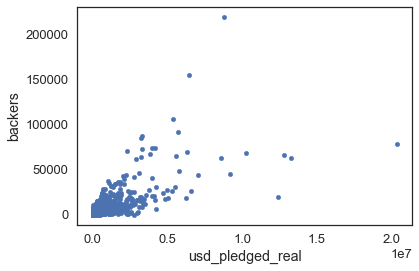

In [16]:
ks_2018_data.plot.scatter(x='usd_pledged_real', y='backers')


In [17]:
ks_2018_data['avg_dollars_per_backer'] = ks_2018_data.usd_pledged_real / ks_2018_data.backers

In [18]:
ks_2018_data['avg_dollars_per_backer'].describe()

count   326134.00
mean    inf      
std     nan      
min     0.45     
25%     25.50    
50%     49.00    
75%     86.24    
max     inf      
Name: avg_dollars_per_backer, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1185b6a0>]],
      dtype=object)

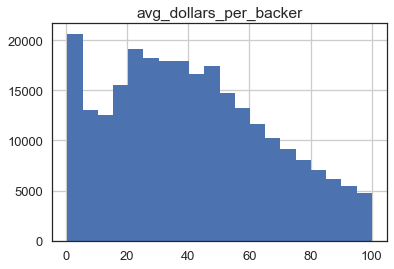

In [19]:
import numpy as np

ks_2018_data[(np.isfinite(ks_2018_data.avg_dollars_per_backer)) & (ks_2018_data.avg_dollars_per_backer < 100)].hist(column='avg_dollars_per_backer', bins=20)

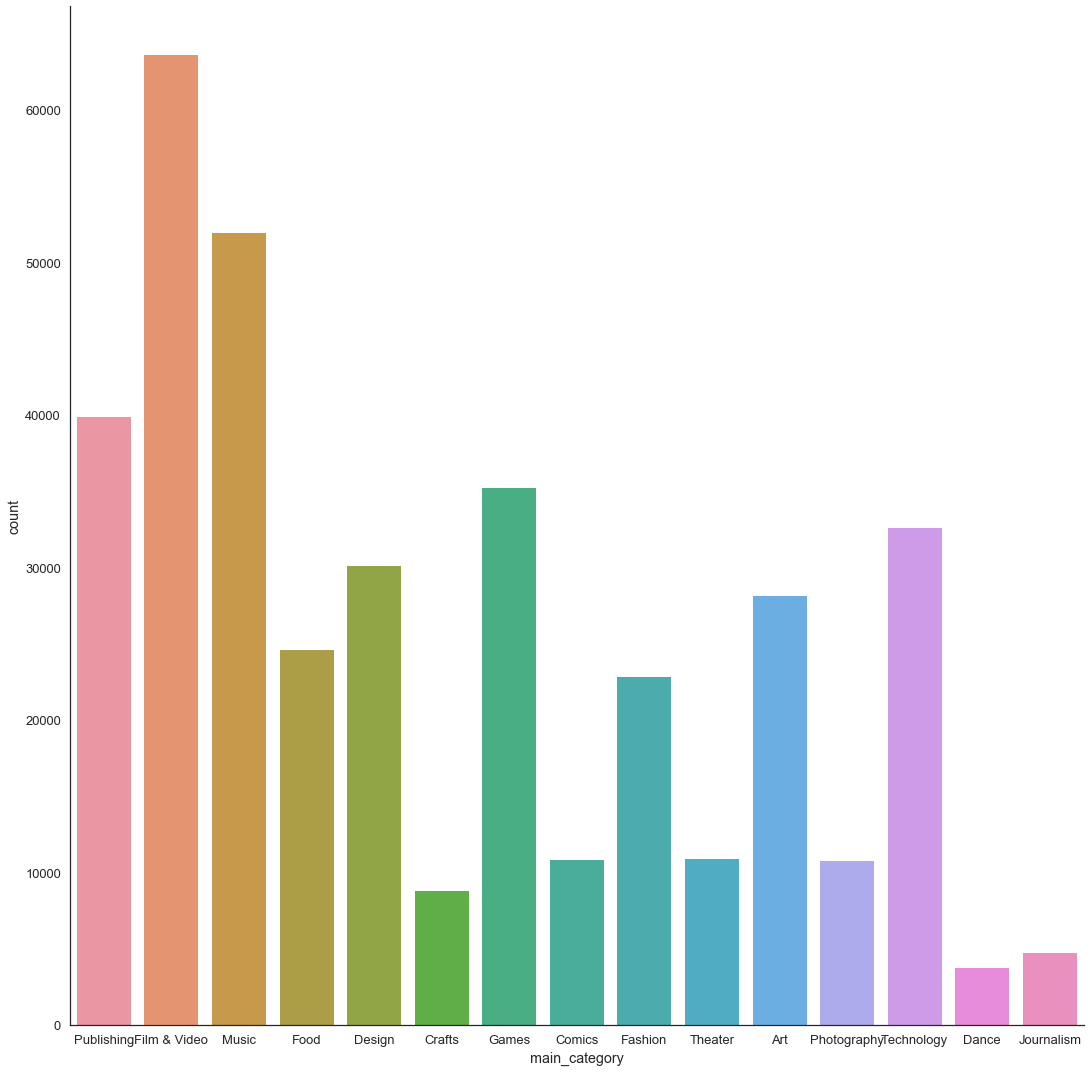

In [20]:
sns.factorplot('main_category',data=ks_2018_data,kind='count', size=15)


Text(0.5,1,'Average Backers per State')

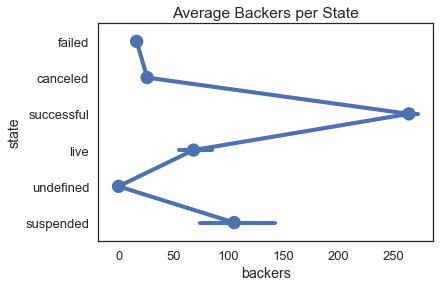

In [22]:

sns.pointplot(y='state',x= 'backers', data=ks_2018_data).set_title("Average Backers per State")











AttributeError: Cannot access callable attribute 'get' of 'DataFrameGroupBy' objects, try using the 'apply' method

Text(0.5,1,'Average Goal per State')

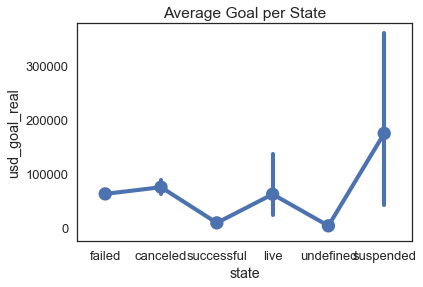

In [32]:
sns.pointplot(y='usd_goal_real',x= 'state', data=ks_2018_data).set_title("Average Goal per State")


In [177]:
ks_2018_data[(ks_2018_data.state == 'successful') & (np.isfinite(ks_2018_data.avg_dollars_per_backer))].avg_dollars_per_backer.describe()
#ks_2018_data[ks_2018_data.state == 'successful'].hist(column='usd_goal_real', bins=200)

count   133851.00
mean    91.12    
std     125.53   
min     0.78     
25%     41.18    
50%     63.31    
75%     102.17   
max     10000.00 
Name: avg_dollars_per_backer, dtype: float64

In [37]:
ks_2018_data[((ks_2018_data.state == 'failed') | (ks_2018_data.state == 'canceled')) & (np.isfinite(ks_2018_data.avg_dollars_per_backer))].avg_dollars_per_backer.describe()

count   185721.00
mean    64.30    
std     156.30   
min     0.45     
25%     17.20    
50%     36.00    
75%     67.79    
max     10000.00 
Name: avg_dollars_per_backer, dtype: float64

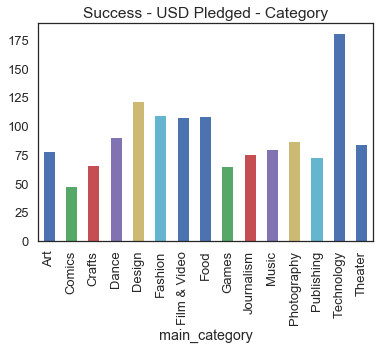

In [51]:
ks_2018_data[(np.isfinite(ks_2018_data.avg_dollars_per_backer)) & (ks_2018_data.state == 'successful')].groupby('main_category')['avg_dollars_per_backer'].mean().plot('bar', title="Success - USD Pledged by Category")


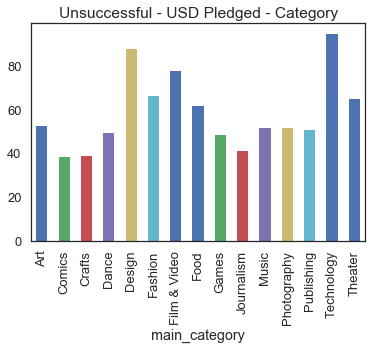

In [52]:
ks_2018_data[(np.isfinite(ks_2018_data.avg_dollars_per_backer)) & ((ks_2018_data.state == 'failed') | (ks_2018_data.state == 'canceled'))].groupby('main_category')['avg_dollars_per_backer'].mean().plot('bar', title="Unsuccessful - USD Pledged by Category")


In [33]:
ks_2018_data[ks_2018_data.state == 'successful'].sort_values(['goal'], ascending=False).head(20)

#goal vs usd goal
#does currency impact goal

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration,avg_dollars_per_backer
368573,947809001,Shenmue 3,Video Games,Games,USD,2015-07-18,2000000.00,2015-06-16 03:51:04,6333295.77,successful,69320,US,6333295.77,6333295.77,2000000.00,2015-06-16 03:51:04+00:00,2015-07-18 00:00:00+00:00,31 days 20:08:56,91.36
114585,1581905668,Ghost S1 MkII,Technology,Technology,SEK,2017-12-29,2000000.00,2017-11-29 21:03:22,2588996.65,successful,1260,SE,142863.16,315423.57,243664.72,2017-11-29 21:03:22+00:00,2017-12-29 00:00:00+00:00,29 days 02:56:38,250.34
148585,1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.00,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.00,2013-03-13 15:42:22+00:00,2013-04-13 00:00:00+00:00,30 days 08:17:38,62.26
89481,1454565733,Bring Back MYSTERY SCIENCE THEATER 3000,Television,Film & Video,USD,2015-12-12,2000000.00,2015-11-10 16:49:32,5764229.38,successful,48270,US,5764229.38,5764229.38,2000000.00,2015-11-10 16:49:32+00:00,2015-12-12 00:00:00+00:00,31 days 07:10:28,119.42
171322,1871494789,WISH I WAS HERE,Narrative Film,Film & Video,USD,2013-05-24,2000000.00,2013-04-24 11:57:04,3105473.10,successful,46520,US,3105473.10,3105473.10,2000000.00,2013-04-24 11:57:04+00:00,2013-05-24 00:00:00+00:00,29 days 12:02:56,66.76
134462,1682353635,Camelot Unchained,Video Games,Games,USD,2013-05-02,2000000.00,2013-04-02 17:56:11,2232933.03,successful,14873,US,2232933.03,2232933.03,2000000.00,2013-04-02 17:56:11+00:00,2013-05-02 00:00:00+00:00,29 days 06:03:49,150.13
324291,721748605,Blue Mountain State: The Movie,Narrative Film,Film & Video,USD,2014-05-15,1500000.00,2014-04-15 14:43:13,1911827.41,successful,23999,US,1911827.41,1911827.41,1500000.00,2014-04-15 14:43:13+00:00,2014-05-15 00:00:00+00:00,29 days 09:16:47,79.66
212044,2080807368,The 901 Collection - Made from salvaged Porsche 911’s,Design,Design,DKK,2017-04-30,1400000.00,2017-03-31 16:23:00,4075739.00,successful,546,DK,280902.02,600707.31,206340.55,2017-03-31 16:23:00+00:00,2017-04-30 00:00:00+00:00,29 days 07:37:00,1100.20
53273,1271291185,THE P-51 AUTOMATIC WATCH by REC - Recycling Horsepower!,Product Design,Design,DKK,2016-01-04,1400000.00,2015-11-20 18:56:01,3193364.00,successful,553,DK,457571.35,464935.65,203832.04,2015-11-20 18:56:01+00:00,2016-01-04 00:00:00+00:00,44 days 05:03:59,840.75
111636,1567218706,The Newest Hottest Spike Lee Joint,Narrative Film,Film & Video,USD,2013-08-21,1250000.00,2013-07-22 18:15:41,1418910.22,successful,6421,US,1418910.22,1418910.22,1250000.00,2013-07-22 18:15:41+00:00,2013-08-21 00:00:00+00:00,29 days 05:44:19,220.98


In [46]:
ks_2018_data['gap'] = ks_2018_data['usd_pledged_real'] / ks_2018_data['usd_goal_real']

ks_2018_data[(ks_2018_data.state == 'canceled') | (ks_2018_data.state == 'failed')].groupby('main_category').gap.mean().sort_values(axis=0, ascending=False)



main_category
Games          1.23
Technology     0.56
Design         0.25
Film & Video   0.17
Comics         0.16
Fashion        0.16
Art            0.11
Theater        0.11
Crafts         0.10
Dance          0.10
Music          0.09
Publishing     0.08
Photography    0.08
Food           0.08
Journalism     0.05
Name: gap, dtype: float64

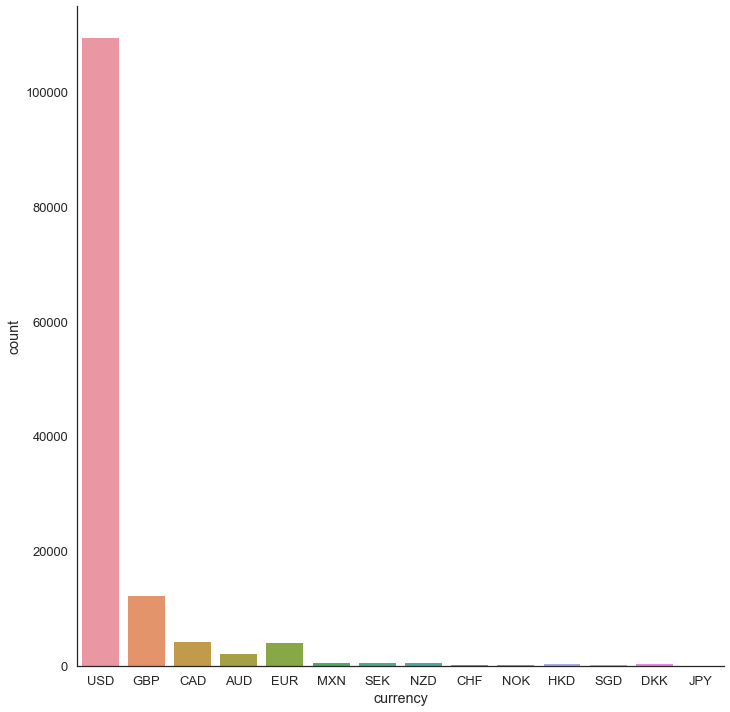

In [41]:
#duration delta

#ks_2018_data['duration'] = ks_2018_data.deadline - ks_2018_data.launched


sns.factorplot('currency',data=ks_2018_data[(ks_2018_data.state == 'successful')],kind='count', size=10)



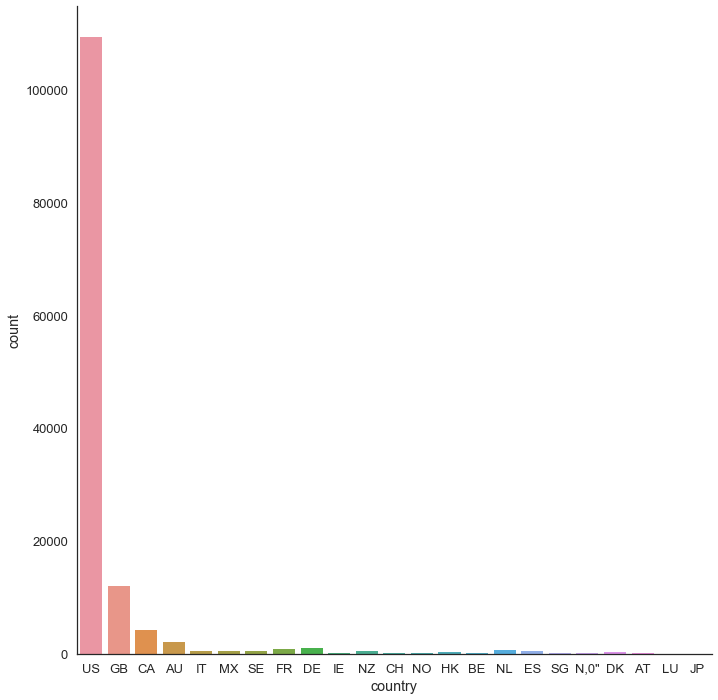

In [197]:
sns.factorplot('country',data=ks_2018_data[(ks_2018_data.state == 'successful')],kind='count', size=10)